# Project Title: US Accidents Exploratory Data Analysis (EDA)
**Project Description**
- This project analyzes a large dataset of road accidents in the United States to identify patterns, trends, and factors contributing to accident severity. Using Python (Pandas, Matplotlib, Seaborn), the project focuses on data preprocessing, visualization, and insights extraction.




In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns


In [2]:
us_df = pd.read_csv(r"C:\Users\furqan ahmed\Desktop\Data sets\US_Accidents_March23.csv")
us_df

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.010,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.010,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.010,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.010,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.010,...,False,False,False,False,True,False,Day,Day,Day,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7728389,A-7777757,Source1,2,2019-08-23 18:03:25,2019-08-23 18:32:01,34.002480,-117.379360,33.99888,-117.37094,0.543,...,False,False,False,False,False,False,Day,Day,Day,Day
7728390,A-7777758,Source1,2,2019-08-23 19:11:30,2019-08-23 19:38:23,32.766960,-117.148060,32.76555,-117.15363,0.338,...,False,False,False,False,False,False,Day,Day,Day,Day
7728391,A-7777759,Source1,2,2019-08-23 19:00:21,2019-08-23 19:28:49,33.775450,-117.847790,33.77740,-117.85727,0.561,...,False,False,False,False,False,False,Day,Day,Day,Day
7728392,A-7777760,Source1,2,2019-08-23 19:00:21,2019-08-23 19:29:42,33.992460,-118.403020,33.98311,-118.39565,0.772,...,False,False,False,False,False,False,Day,Day,Day,Day


**Objective**: The goal of this project is to analyze road accidents in the United States to identify patterns, trends, and factors contributing to accident severity.

**Tools Used**: Python libraries like Pandas, NumPy, Matplotlib, and Seaborn for data manipulation, visualization, and analysis

# Seprate num and cat colmns

In [3]:
num_cols = us_df.select_dtypes(include='object').columns
cat_cols = us_df.select_dtypes(exclude='object').columns

# Data Quick Check 



In [4]:
#shape
us_df.shape #we have 7728394 rows and 46 columns 

(7728394, 46)

In [5]:
#size 
us_df.size

355506124

In [6]:
len(us_df) #len

7728394

In [7]:
us_df.head() #top 5

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,...,False,False,False,False,True,False,Day,Day,Day,Day


In [8]:
us_df.tail() #bottom 5

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
7728389,A-7777757,Source1,2,2019-08-23 18:03:25,2019-08-23 18:32:01,34.00248,-117.37936,33.99888,-117.37094,0.543,...,False,False,False,False,False,False,Day,Day,Day,Day
7728390,A-7777758,Source1,2,2019-08-23 19:11:30,2019-08-23 19:38:23,32.76696,-117.14806,32.76555,-117.15363,0.338,...,False,False,False,False,False,False,Day,Day,Day,Day
7728391,A-7777759,Source1,2,2019-08-23 19:00:21,2019-08-23 19:28:49,33.77545,-117.84779,33.77740,-117.85727,0.561,...,False,False,False,False,False,False,Day,Day,Day,Day
7728392,A-7777760,Source1,2,2019-08-23 19:00:21,2019-08-23 19:29:42,33.99246,-118.40302,33.98311,-118.39565,0.772,...,False,False,False,False,False,False,Day,Day,Day,Day
7728393,A-7777761,Source1,2,2019-08-23 18:52:06,2019-08-23 19:21:31,34.13393,-117.23092,34.13736,-117.23934,0.537,...,False,False,False,False,False,False,Day,Day,Day,Day


In [9]:
us_df.info() #information about data set

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7728394 entries, 0 to 7728393
Data columns (total 46 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Source                 object 
 2   Severity               int64  
 3   Start_Time             object 
 4   End_Time               object 
 5   Start_Lat              float64
 6   Start_Lng              float64
 7   End_Lat                float64
 8   End_Lng                float64
 9   Distance(mi)           float64
 10  Description            object 
 11  Street                 object 
 12  City                   object 
 13  County                 object 
 14  State                  object 
 15  Zipcode                object 
 16  Country                object 
 17  Timezone               object 
 18  Airport_Code           object 
 19  Weather_Timestamp      object 
 20  Temperature(F)         float64
 21  Wind_Chill(F)          float64
 22  Humidity(%)       

**Purpose:** This step helps us understand the dataset's structure, size, and data types.

**Key Insights:**

- The dataset contains 7.7 million rows and 46 columns.

- Columns include accident details like Severity, Start_Time, End_Time, Weather_Condition, and geographical coordinates (Start_Lat, Start_Lng).

**Handling missing values**

In [10]:
us_df.isnull()

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,False,False,False,False,False,False,False,True,True,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,True,True,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,True,True,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,True,True,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,True,True,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7728389,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7728390,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7728391,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7728392,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [11]:
us_df.isnull().sum().sort_values(ascending = False) / len(us_df)

End_Lng                  4.402935e-01
End_Lat                  4.402935e-01
Precipitation(in)        2.851286e-01
Wind_Chill(F)            2.586590e-01
Wind_Speed(mph)          7.391355e-02
Visibility(mi)           2.291524e-02
Wind_Direction           2.267043e-02
Humidity(%)              2.253301e-02
Weather_Condition        2.244438e-02
Temperature(F)           2.120143e-02
Pressure(in)             1.820288e-02
Weather_Timestamp        1.555666e-02
Sunrise_Sunset           3.007869e-03
Civil_Twilight           3.007869e-03
Astronomical_Twilight    3.007869e-03
Nautical_Twilight        3.007869e-03
Airport_Code             2.928810e-03
Street                   1.406372e-03
Timezone                 1.010300e-03
Zipcode                  2.477876e-04
City                     3.273643e-05
Description              6.469649e-07
ID                       0.000000e+00
Distance(mi)             0.000000e+00
Start_Lng                0.000000e+00
Source                   0.000000e+00
Severity    

In [12]:
us_df.drop(columns=['End_Lat', 'End_Lng'], inplace = True)


In [13]:
us_df.drop(columns = "Precipitation(in)",inplace=True)

In [14]:
us_df.drop(columns=['ID', 'Country', 'Turning_Loop'], inplace=True)

**Why Drop Columns?**

**High Missing Values**: Columns like End_Lat, End_Lng, and Precipitation(in) have a significant percentage of missing values (e.g., 44% for End_Lat and End_Lng), making them unreliable for analysis.

**Irrelevant Columns**: Columns like ID (unique identifier) and Country (all values are "US") do not contribute to the analysi

In [15]:
# Check the distribution of True/False values
bool_columns = ['Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction', 
                'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop', 
                'Traffic_Calming', 'Traffic_Signal']

for col in bool_columns:
    print(f"{col}:")
    print(us_df[col].value_counts(normalize=True) * 100)  # Convert to percentage
    print("-" * 30)


Amenity:
Amenity
False    98.753506
True      1.246494
Name: proportion, dtype: float64
------------------------------
Bump:
Bump
False    99.954531
True      0.045469
Name: proportion, dtype: float64
------------------------------
Crossing:
Crossing
False    88.694119
True     11.305881
Name: proportion, dtype: float64
------------------------------
Give_Way:
Give_Way
False    99.526655
True      0.473345
Name: proportion, dtype: float64
------------------------------
Junction:
Junction
False    92.607235
True      7.392765
Name: proportion, dtype: float64
------------------------------
No_Exit:
No_Exit
False    99.747101
True      0.252899
Name: proportion, dtype: float64
------------------------------
Railway:
Railway
False    99.133339
True      0.866661
Name: proportion, dtype: float64
------------------------------
Roundabout:
Roundabout
False    99.996778
True      0.003222
Name: proportion, dtype: float64
------------------------------
Station:
Station
False    97.387543
True  

In [16]:
drop_bool_cols = ['Bump', 'Give_Way', 'No_Exit', 'Roundabout', 'Traffic_Calming', 
                  'Amenity', 'Railway', 'Station', 'Stop']
us_df.drop(columns=drop_bool_cols, inplace=True)


**Reasons for Dropping These Boolean Columns**
- We are dropping columns where the percentage of False values is extremely high (> 97%), making them almost uninformative for analysis.

In [17]:
drop_twilight_cols = ['Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight']
us_df.drop(columns=drop_twilight_cols, inplace=True)


In [18]:
missing_percentage = us_df['Pressure(in)'].isnull().mean() * 100

# Check if it's more than 50%
if missing_percentage > 50:
    print(f"The 'Pressure(in)' column has {missing_percentage:.2f}% missing values, which is more than 50%.")
else:
    print(f"The 'Pressure(in)' column has {missing_percentage:.2f}% missing values, which is less than 50%.")


The 'Pressure(in)' column has 1.82% missing values, which is less than 50%.


In [19]:
us_df.drop(columns=['Pressure(in)'],inplace = True)

In [20]:
# Calculate the percentage of missing values for 'Wind_Chill(F)'
missing_percentage = us_df['Wind_Chill(F)'].isnull().mean() * 100

# Check if it's more than 50%
print(f"The 'Wind_Chill(F)' column has {missing_percentage:.2f}% missing values.")


The 'Wind_Chill(F)' column has 25.87% missing values.


In [21]:
us_df.drop(columns = ['Wind_Chill(F)'],inplace = True)

In [22]:
us_df['Source'].unique()

array(['Source2', 'Source3', 'Source1'], dtype=object)

In [23]:
us_df.drop(columns=['Source'],inplace= True)

In [24]:
cat_cols

Index(['Severity', 'Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng',
       'Distance(mi)', 'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)',
       'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)',
       'Precipitation(in)', 'Amenity', 'Bump', 'Crossing', 'Give_Way',
       'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop',
       'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop'],
      dtype='object')

**Fill numerical missing values with median**

In [25]:
num_cols = us_df.select_dtypes(include= ['int','float']).columns

for col in num_cols:
    us_df[col] = us_df[col].fillna(us_df[col].median())

**Fill categorical missing values with mode (most frequent value)**

In [26]:
cat_cols = us_df.select_dtypes(include='object').columns
cat_cols

Index(['Start_Time', 'End_Time', 'Description', 'Street', 'City', 'County',
       'State', 'Zipcode', 'Timezone', 'Airport_Code', 'Weather_Timestamp',
       'Wind_Direction', 'Weather_Condition', 'Sunrise_Sunset'],
      dtype='object')

In [27]:
us_df[cat_cols] = us_df[cat_cols].apply(lambda x: x.fillna(x.mode()[0]))


**Why Fill Missing Values?**

**Numerical Columns:** Missing values are filled with the median to preserve the distribution.

**Categorical Columns:** Missing values are filled with the mode (most frequent value) to maintain consistency.

**Feature Engineering**

In [28]:
num_cols = us_df.select_dtypes(exclude='object').columns
num_cols

Index(['Severity', 'Start_Lat', 'Start_Lng', 'Distance(mi)', 'Temperature(F)',
       'Humidity(%)', 'Visibility(mi)', 'Wind_Speed(mph)', 'Crossing',
       'Junction', 'Traffic_Signal'],
      dtype='object')

In [29]:
cat_cols = us_df.select_dtypes(include='object').columns
cat_cols

Index(['Start_Time', 'End_Time', 'Description', 'Street', 'City', 'County',
       'State', 'Zipcode', 'Timezone', 'Airport_Code', 'Weather_Timestamp',
       'Wind_Direction', 'Weather_Condition', 'Sunrise_Sunset'],
      dtype='object')

In [30]:
# Convert columns to appropriate numeric types
us_df['Temperature(F)'] = pd.to_numeric(us_df['Temperature(F)'], errors='coerce')  # Convert to float64
us_df['Wind_Speed(mph)'] = pd.to_numeric(us_df['Wind_Speed(mph)'], errors='coerce')  # Convert to float64

In [31]:
# Convert relevant columns to category
us_df['State'] = us_df['State'].astype('category')
us_df['City'] = us_df['City'].astype('category')
us_df['County'] = us_df['County'].astype('category')
us_df['Zipcode'] = us_df['Zipcode'].astype('category')
us_df['Timezone'] = us_df['Timezone'].astype('category')
us_df['Airport_Code'] = us_df['Airport_Code'].astype('category')
us_df['Weather_Condition'] = us_df['Weather_Condition'].astype('category')
us_df['Description'] = us_df['Description'].astype('category')

In [32]:
# Convert time columns to datetime
us_df['Start_Time'] = pd.to_datetime(us_df['Start_Time'], errors='coerce')
us_df['End_Time'] = pd.to_datetime(us_df['End_Time'], errors='coerce')
us_df['Weather_Timestamp'] = pd.to_datetime(us_df['Weather_Timestamp'], errors='coerce')

**Purpose:** Extracting time-based features like Hour, Day, Month, and Weekday helps analyze trends over time (e.g., accidents by hour or month).

# Exploratory Data Analysis (EDA):


In [33]:
cat_cols = us_df.select_dtypes(include=['category', 'object']).columns
num_cols = us_df.select_dtypes(include=['int', 'float']).columns
dat_time_cols = us_df.select_dtypes(include='datetime').columns


In [34]:
us_df['Severity'] = us_df['Severity'].replace({1: 'Minor', 2: 'Moderate', 3: 'High', 4: 'Extreme'})
#the resaon we chaning the value becus it will give better understanding of data

**Distribution of Accident Severity (Severity)**

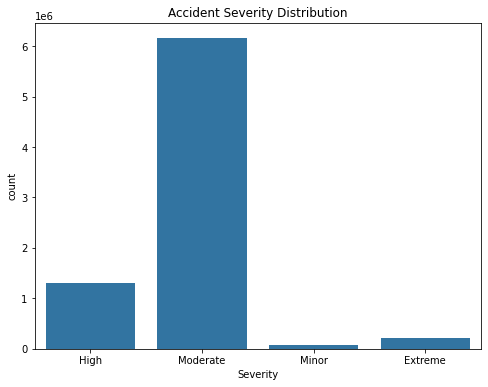

Severity
Moderate    79.667017
High        16.812510
Extreme      2.648804
Minor        0.871669
Name: proportion, dtype: float64


In [35]:
severity_counts = us_df['Severity'].value_counts()
plt.figure(figsize=(8,6))
sns.countplot(x = us_df['Severity'])
plt.title('Accident Severity Distribution')
plt.xlabel('Severity')
plt.ylabel('count')
plt.show()
#Percentage Calculation
severity_counts = us_df['Severity'].value_counts(normalize = True) * 100
print(severity_counts)

**Insights**:

- Moderate accidents account for 79.67% of the dataset, while High and Extreme accidents are less frequent.

- This indicates that most accidents are not extremely severe.



**Time Analysis (Hourly & Weekly Trends)**

In [36]:
us_df['Start_Time']

0         2016-02-08 05:46:00
1         2016-02-08 06:07:59
2         2016-02-08 06:49:27
3         2016-02-08 07:23:34
4         2016-02-08 07:39:07
                  ...        
7728389   2019-08-23 18:03:25
7728390   2019-08-23 19:11:30
7728391   2019-08-23 19:00:21
7728392   2019-08-23 19:00:21
7728393   2019-08-23 18:52:06
Name: Start_Time, Length: 7728394, dtype: datetime64[ns]

In [37]:


# Extract time-based features
# Extract hour, day, month, and weekday
us_df["Hour"] = us_df["Start_Time"].dt.hour
us_df["Day"] = us_df["Start_Time"].dt.day
us_df["Month"] = us_df["Start_Time"].dt.month
us_df["Weekday"] = us_df["Start_Time"].dt.day_name()

# Display first few rows
print(us_df[["Start_Time", "Hour", "Day", "Month", "Weekday"]].head())



           Start_Time  Hour  Day  Month Weekday
0 2016-02-08 05:46:00   5.0  8.0    2.0  Monday
1 2016-02-08 06:07:59   6.0  8.0    2.0  Monday
2 2016-02-08 06:49:27   6.0  8.0    2.0  Monday
3 2016-02-08 07:23:34   7.0  8.0    2.0  Monday
4 2016-02-08 07:39:07   7.0  8.0    2.0  Monday


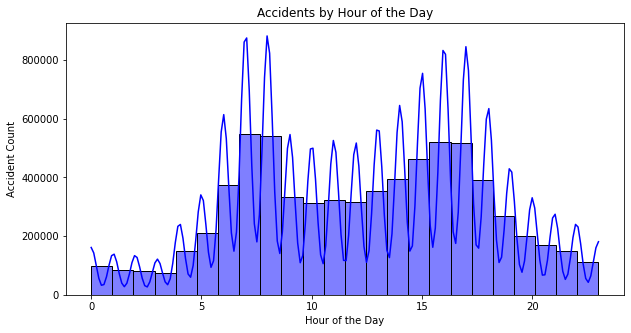

In [38]:
plt.figure(figsize=(10, 5))
sns.histplot(us_df["Hour"], bins=24, kde=True, color='blue')
plt.title("Accidents by Hour of the Day")
plt.xlabel("Hour of the Day")
plt.ylabel("Accident Count")
plt.show()


**Insights:**

- Accidents peak during rush hours (e.g., 7-9 AM and 4-6 PM), likely due to increased traffic

**State & City-wise Analysis**

State
CA    1741433
FL     880192
TX     582837
SC     382557
NY     347960
NC     338199
VA     303301
PA     296620
MN     192084
OR     179660
Name: count, dtype: int64


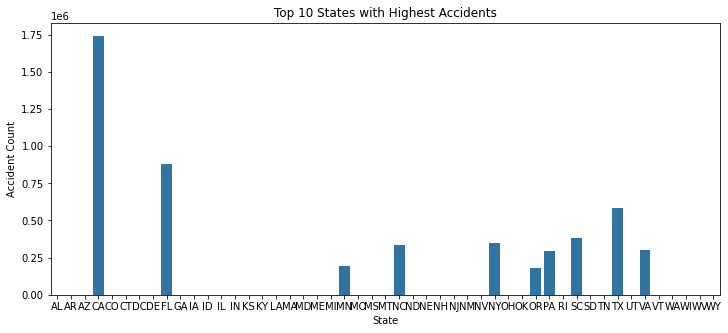

In [39]:
top_states = us_df['State'].value_counts().head(10)
print(top_states)
plt.figure(figsize=(12,5))
sns.barplot(x = top_states.index, y = top_states.values)
plt.title('Top 10 States with Highest Accidents')
plt.xlabel('State')
plt.ylabel('Accident Count')
plt.show()


**Insights:**

- California (CA) has the highest number of accidents, followed by Florida (FL) and Texas (TX).

**Most Common Weather Conditions During Accidents**

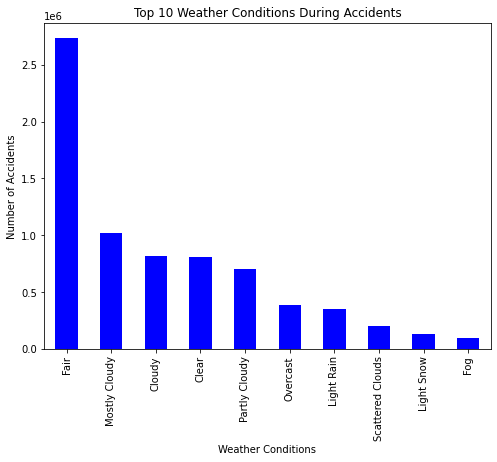

In [40]:
weather_conditions = us_df['Weather_Condition'].value_counts()
top_10 = weather_conditions.sort_values(ascending = False).head(10)
plt.figure(figsize=(8,6))
top_10.plot(kind = 'bar', color = 'Blue')
plt.title('Top 10 Weather Conditions During Accidents')
plt.xlabel('Weather Conditions')
plt.ylabel('Number of Accidents')
plt.show()

**Insights:**

- Most accidents occur during clear weather, followed by light rain and cloudy conditions.

**Most Frequent Accident Locations (State, City, County)**

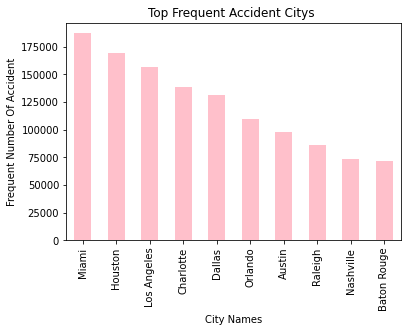

In [41]:
city_counts = us_df['City'].value_counts()
top_10_city = city_counts.sort_values(ascending = False).head(10)
plt.figure(figure=(8,6))
top_10_city.plot(kind = 'bar',color = 'Pink')
plt.title("Top Frequent Accident Citys ")
plt.xlabel('City Names')
plt.ylabel('Frequent Number Of Accident')
plt.show()

**Insights:**
- Miami leads with the highest number of accidents at 175,000, followed by Houston at 150,000 and Los Angeles at 125,000, reflecting the correlation between urban density and accident rates. These cities' high traffic volumes contribute significantly to the accident statistics.

# Bi-Multi variate Analysis

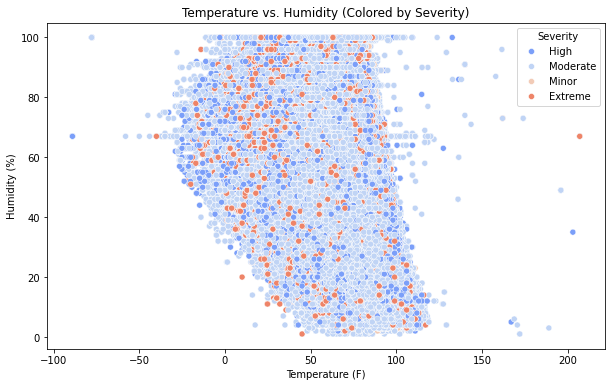

In [43]:
#Scatter plot: Temperature vs. Humidity
plt.figure(figsize=(10, 6))
sns.scatterplot(data=us_df, x='Temperature(F)', y='Humidity(%)', hue='Severity', palette='coolwarm')
plt.title("Temperature vs. Humidity (Colored by Severity)")
plt.xlabel("Temperature (F)")
plt.ylabel("Humidity (%)")
plt.legend(title="Severity", loc="upper right")
plt.show()

**Insights:**

If points are clustered in certain areas, it might indicate that accidents are more frequent or severe under specific temperature and humidity conditions.

For example, high humidity and low temperatures might correlate with higher severity.

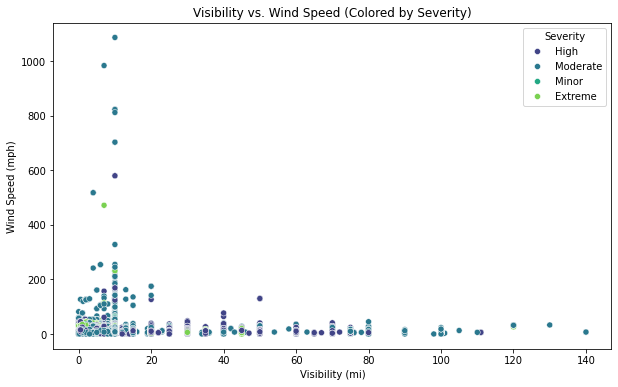

In [44]:
# Scatter plot: Visibility vs. Wind Speed
plt.figure(figsize=(10, 6))
sns.scatterplot(data=us_df, x='Visibility(mi)', y='Wind_Speed(mph)', hue='Severity', palette='viridis')
plt.title("Visibility vs. Wind Speed (Colored by Severity)")
plt.xlabel("Visibility (mi)")
plt.ylabel("Wind Speed (mph)")
plt.legend(title="Severity", loc="upper right")
plt.show()

**Insights:**

Low visibility and high wind speeds might correlate with higher accident severity.

Outliers (e.g., very high wind speeds or very low visibility) can indicate extreme weather conditions

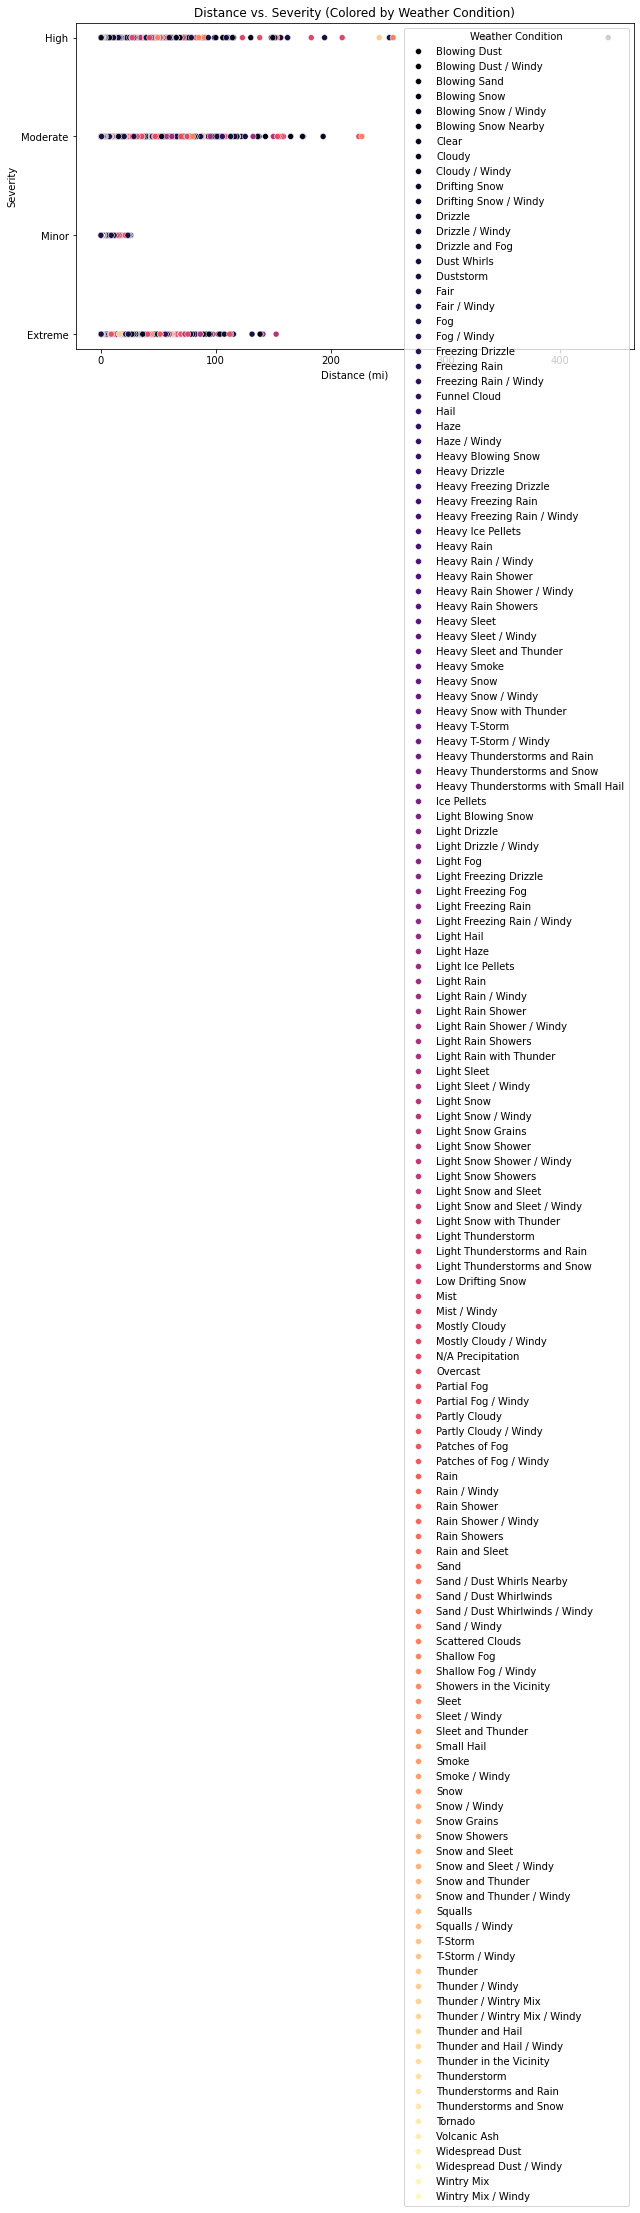

In [45]:
# Scatter plot: Distance vs. Severity
plt.figure(figsize=(10, 6))
sns.scatterplot(data=us_df, x='Distance(mi)', y='Severity', hue='Weather_Condition', palette='magma')
plt.title("Distance vs. Severity (Colored by Weather Condition)")
plt.xlabel("Distance (mi)")
plt.ylabel("Severity")
plt.legend(title="Weather Condition", loc="upper right")
plt.show()

**Insights:**

Longer distances might correlate with higher severity, especially under adverse weather conditions.



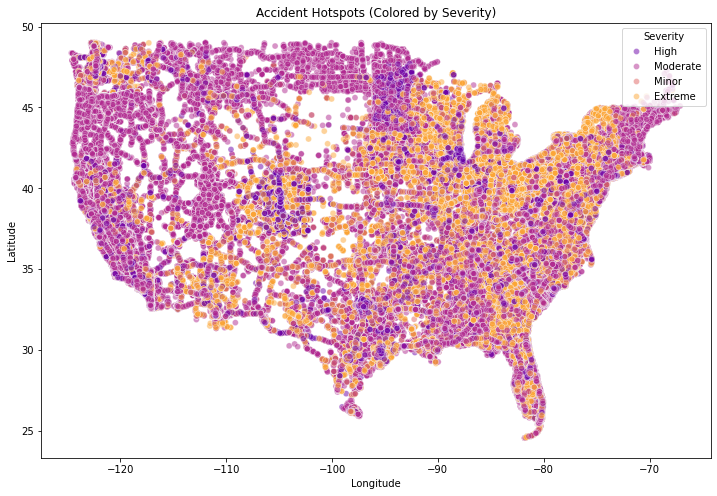

In [46]:
# Scatter plot: Latitude vs. Longitude
plt.figure(figsize=(12, 8))
sns.scatterplot(data=us_df, x='Start_Lng', y='Start_Lat', hue='Severity', palette='plasma', alpha=0.5)
plt.title("Accident Hotspots (Colored by Severity)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend(title="Severity", loc="upper right")
plt.show()

**Insights:**

- Clusters of points indicate accident hotspots (e.g., urban areas or highways).

- Higher severity accidents might be concentrated in specific regions.
- The Eastern U.S. experiences more accidents due to its higher population and traffic density, with 80% of Americans living in the East and only 20% in the West. The greater concentration of vehicles leads to more frequent incidents

**Box plot: Severity vs. Weather Condition**

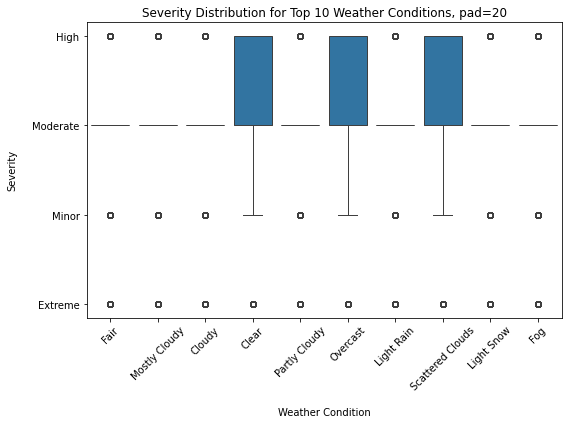

In [47]:
weathe_10 = us_df['Weather_Condition'].value_counts().nlargest(10).index
filtered_df = us_df[us_df['Weather_Condition'].isin(weathe_10)]
plt.figure(figsize=(8, 6))
sns.boxplot(data = filtered_df, x = 'Weather_Condition', y = 'Severity', order=weathe_10)
plt.xticks(rotation = 45)
plt.xlabel("Weather Condition", labelpad=15)
plt.ylabel("Severity", labelpad=15)
plt.title("Severity Distribution for Top 10 Weather Conditions, pad=20")
plt.tight_layout()
plt.show()

**Insights:**

- This plot will show how accident severity varies under different weather conditions.

- For example, you might find that accidents during snowy conditions tend to be more severe than during clear weather.

**Correlation Analysis**

In [48]:
num_cols = us_df.select_dtypes(include=['int', 'float']).columns
num_df = us_df[num_cols]

In [49]:
corr = num_df.corr()

**Create a Heatmap**

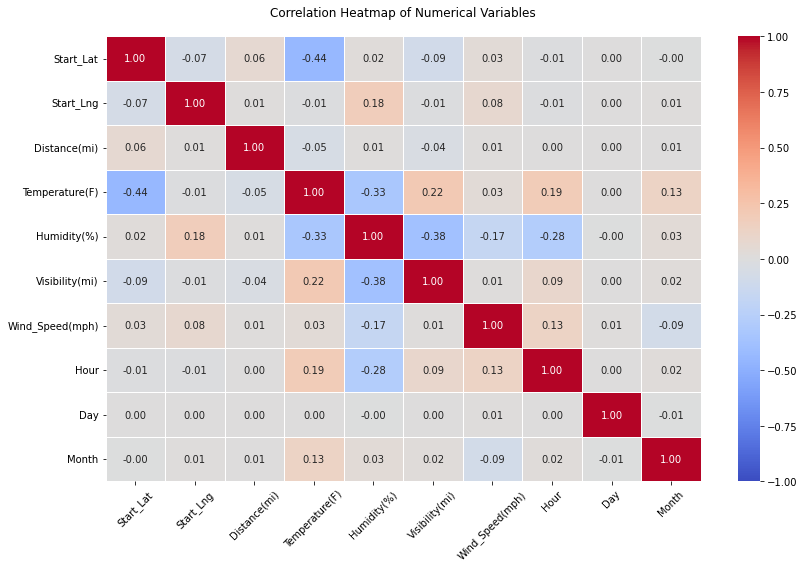

In [50]:
plt.figure(figsize=(12,8))
sns.heatmap(
    corr,
    annot = True,
    fmt = '.2f',
    cmap = 'coolwarm',
    vmin = -1, vmax = 1,
    linewidths=0.5
)
plt.title("Correlation Heatmap of Numerical Variables", pad= 20)
plt.xticks(rotation=45)  
  
plt.tight_layout()
plt.show()

**Key Observations**
- **Highly Correlated Pairs:**
- Start_Lat & Temperature(F) (-0.44) → Moderate negative correlation, suggesting that accidents at certain latitudes might be influenced by temperature variations.
- Humidity(%) & Temperature(F) (-0.33) → Expected inverse relationship—higher humidity often accompanies lower temperatures.
- Visibility(mi) & Humidity(%) (-0.38) → As humidity increases, visibility tends to decrease (e.g., foggy conditions).
- **Weak or No Correlation:**
- Distance(mi) & Weather Variables (~0.01 to -0.05) → Distance of accidents doesn’t seem significantly affected by weather.
- Hour, Day, and Month (~0.00 to 0.13) → Time-based features have weak correlations with other variables, suggesting that accident severity may not be strongly dependent on specific times.

# Feature Encoding

**Encoding (For Categorical Variables)**

In [51]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
us_df['Severity'] = le.fit_transform(us_df['Severity'])


In [52]:
us_df

,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,Distance(mi),Description,Street,City,County,...,Wind_Speed(mph),Weather_Condition,Crossing,Junction,Traffic_Signal,Sunrise_Sunset,Hour,Day,Month,Weekday
0,1,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,0.010,Right lane blocked due to accident on I-70 Eas...,I-70 E,Dayton,Montgomery,...,7.0,Light Rain,False,False,False,Night,5.0,8.0,2.0,Monday
1,3,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,0.010,Accident on Brice Rd at Tussing Rd. Expect del...,Brice Rd,Reynoldsburg,Franklin,...,7.0,Light Rain,False,False,False,Night,6.0,8.0,2.0,Monday
2,3,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,0.010,Accident on OH-32 State Route 32 Westbound at ...,State Route 32,Williamsburg,Clermont,...,3.5,Overcast,False,False,True,Night,6.0,8.0,2.0,Monday
3,1,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,0.010,Accident on I-75 Southbound at Exits 52 52B US...,I-75 S,Dayton,Montgomery,...,4.6,Mostly Cloudy,False,False,False,Night,7.0,8.0,2.0,Monday
4,3,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,0.010,Accident on McEwen Rd at OH-725 Miamisburg Cen...,Miamisburg Centerville Rd,Dayton,Montgomery,...,3.5,Mostly Cloudy,False,False,True,Day,7.0,8.0,2.0,Monday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7728389,3,2019-08-23 18:03:25,2019-08-23 18:32:01,34.002480,-117.379360,0.543,At Market St - Accident.,Pomona Fwy E,Riverside,Riverside,...,13.0,Fair,False,False,False,Day,18.0,23.0,8.0,Friday
7728390,3,2019-08-23 19:11:30,2019-08-23 19:38:23,32.766960,-117.148060,0.338,At Camino Del Rio/Mission Center Rd - Accident.,I-8 W,San Diego,San Diego,...,6.0,Fair,False,False,False,Day,19.0,23.0,8.0,Friday
7728391,3,2019-08-23 19:00:21,2019-08-23 19:28:49,33.775450,-117.847790,0.561,At Glassell St/Grand Ave - Accident. in the ri...,Garden Grove Fwy,Orange,Orange,...,10.0,Partly Cloudy,False,True,False,Day,19.0,23.0,8.0,Friday
7728392,3,2019-08-23 19:00:21,2019-08-23 19:29:42,33.992460,-118.403020,0.772,At CA-90/Marina Fwy/Jefferson Blvd - Accident.,San Diego Fwy S,Culver City,Los Angeles,...,8.0,Fair,False,False,False,Day,19.0,23.0,8.0,Friday


**One-Hot Encoding**

In [53]:
from sklearn.preprocessing import OneHotEncoder
pd.get_dummies(us_df,columns=['Sunrise_Sunset'])

,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,Distance(mi),Description,Street,City,County,...,Weather_Condition,Crossing,Junction,Traffic_Signal,Hour,Day,Month,Weekday,Sunrise_Sunset_Day,Sunrise_Sunset_Night
0,1,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,0.010,Right lane blocked due to accident on I-70 Eas...,I-70 E,Dayton,Montgomery,...,Light Rain,False,False,False,5.0,8.0,2.0,Monday,False,True
1,3,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,0.010,Accident on Brice Rd at Tussing Rd. Expect del...,Brice Rd,Reynoldsburg,Franklin,...,Light Rain,False,False,False,6.0,8.0,2.0,Monday,False,True
2,3,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,0.010,Accident on OH-32 State Route 32 Westbound at ...,State Route 32,Williamsburg,Clermont,...,Overcast,False,False,True,6.0,8.0,2.0,Monday,False,True
3,1,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,0.010,Accident on I-75 Southbound at Exits 52 52B US...,I-75 S,Dayton,Montgomery,...,Mostly Cloudy,False,False,False,7.0,8.0,2.0,Monday,False,True
4,3,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,0.010,Accident on McEwen Rd at OH-725 Miamisburg Cen...,Miamisburg Centerville Rd,Dayton,Montgomery,...,Mostly Cloudy,False,False,True,7.0,8.0,2.0,Monday,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7728389,3,2019-08-23 18:03:25,2019-08-23 18:32:01,34.002480,-117.379360,0.543,At Market St - Accident.,Pomona Fwy E,Riverside,Riverside,...,Fair,False,False,False,18.0,23.0,8.0,Friday,True,False
7728390,3,2019-08-23 19:11:30,2019-08-23 19:38:23,32.766960,-117.148060,0.338,At Camino Del Rio/Mission Center Rd - Accident.,I-8 W,San Diego,San Diego,...,Fair,False,False,False,19.0,23.0,8.0,Friday,True,False
7728391,3,2019-08-23 19:00:21,2019-08-23 19:28:49,33.775450,-117.847790,0.561,At Glassell St/Grand Ave - Accident. in the ri...,Garden Grove Fwy,Orange,Orange,...,Partly Cloudy,False,True,False,19.0,23.0,8.0,Friday,True,False
7728392,3,2019-08-23 19:00:21,2019-08-23 19:29:42,33.992460,-118.403020,0.772,At CA-90/Marina Fwy/Jefferson Blvd - Accident.,San Diego Fwy S,Culver City,Los Angeles,...,Fair,False,False,False,19.0,23.0,8.0,Friday,True,False


**Purpose:**

**Label Encoding:** Converts categorical Severity values into numerical labels for modeling.

**One-Hot Encoding:** Converts categorical variables like Sunrise_Sunset into binary columns for machine learning.

# **Feature Scaling** 
- #StandardScaler

In [54]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
us_df[['Temperature(F)', 'Humidity(%)']] = scaler.fit_transform(us_df[['Temperature(F)', 'Humidity(%)']])


In [55]:
us_df

,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,Distance(mi),Description,Street,City,County,...,Wind_Speed(mph),Weather_Condition,Crossing,Junction,Traffic_Signal,Sunrise_Sunset,Hour,Day,Month,Weekday
0,1,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,0.010,Right lane blocked due to accident on I-70 Eas...,I-70 E,Dayton,Montgomery,...,7.0,Light Rain,False,False,False,Night,5.0,8.0,2.0,Monday
1,3,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,0.010,Accident on Brice Rd at Tussing Rd. Expect del...,Brice Rd,Reynoldsburg,Franklin,...,7.0,Light Rain,False,False,False,Night,6.0,8.0,2.0,Monday
2,3,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,0.010,Accident on OH-32 State Route 32 Westbound at ...,State Route 32,Williamsburg,Clermont,...,3.5,Overcast,False,False,True,Night,6.0,8.0,2.0,Monday
3,1,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,0.010,Accident on I-75 Southbound at Exits 52 52B US...,I-75 S,Dayton,Montgomery,...,4.6,Mostly Cloudy,False,False,False,Night,7.0,8.0,2.0,Monday
4,3,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,0.010,Accident on McEwen Rd at OH-725 Miamisburg Cen...,Miamisburg Centerville Rd,Dayton,Montgomery,...,3.5,Mostly Cloudy,False,False,True,Day,7.0,8.0,2.0,Monday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7728389,3,2019-08-23 18:03:25,2019-08-23 18:32:01,34.002480,-117.379360,0.543,At Market St - Accident.,Pomona Fwy E,Riverside,Riverside,...,13.0,Fair,False,False,False,Day,18.0,23.0,8.0,Friday
7728390,3,2019-08-23 19:11:30,2019-08-23 19:38:23,32.766960,-117.148060,0.338,At Camino Del Rio/Mission Center Rd - Accident.,I-8 W,San Diego,San Diego,...,6.0,Fair,False,False,False,Day,19.0,23.0,8.0,Friday
7728391,3,2019-08-23 19:00:21,2019-08-23 19:28:49,33.775450,-117.847790,0.561,At Glassell St/Grand Ave - Accident. in the ri...,Garden Grove Fwy,Orange,Orange,...,10.0,Partly Cloudy,False,True,False,Day,19.0,23.0,8.0,Friday
7728392,3,2019-08-23 19:00:21,2019-08-23 19:29:42,33.992460,-118.403020,0.772,At CA-90/Marina Fwy/Jefferson Blvd - Accident.,San Diego Fwy S,Culver City,Los Angeles,...,8.0,Fair,False,False,False,Day,19.0,23.0,8.0,Friday


**Purpose:**

- Scaling ensures that numerical features like Temperature(F) and Humidity(%) are on the same scale, improving model performance.

# **Key Takeaways**
**Accident Severity:** Most accidents are moderate, with a small percentage being extreme.

**Time Trends:** Accidents peak during rush hours and are more frequent in certain months.

**Geographical Trends:** California, Florida, and Texas have the highest accident rates.

**Weather Impact:** Clear weather is the most common condition during accidents, but adverse weather (e.g., rain, fog) can increase severity.

**Correlation Insights:** Temperature and humidity are moderately correlated, while visibility decreases with higher humidity.

# Next Steps
**Predictive Modeling:**

- Use the cleaned and preprocessed data to build a predictive model for accident severity

**Advanced Visualizations:**

Create interactive dashboards using tools like Power Bi or Tableau.